# Automatic Machine Fault Detection and Recognition 

## Project Description:
This project aims to develop an automatic fault detection and recognition system for machines using computer vision techniques. The system analyzes audio signals generated by the machines to detect and classify different types of faults. By leveraging machine learning models and signal processing techniques, it can identify various anomalies in the machine operation, such as Arcing, Corona, Looseness and Tracking.

The key components of the project include:

- **Feature Extraction:** Features such as Mel-frequency cepstral coefficients (MFCC), chroma features, and mel spectrograms are extracted from the audio signals to characterize the underlying patterns.
- **Model Development:** Convolutional neural network (CNN) models are trained on the extracted features to learn the patterns associated with different types of faults.
- **Model Evaluation:** The trained models are evaluated using performance metrics such as accuracy, F1-score, ROC curves, and confusion matrices to assess their effectiveness in fault detection and recognition.
- **Real-time Testing:** The system is capable of real-time testing, where it can classify faults in new audio samples captured from the machines during operation.

By automating the fault detection and recognition process, this system aims to enhance maintenance practices, reduce downtime, and improve overall operational efficiency in industrial settings.

### Step 1: Importing Libraries and Dependencies


This step involves importing necessary libraries and dependencies required for the project. These libraries facilitate data handling, feature extraction, model development, evaluation, and visualization.

In [1]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout

In [2]:
# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")

### Step 2: Data Loading, Feature Extraction, and Model Preparation

In this step, we define functions to load audio data, extract features from audio signals, and create a convolutional neural network (CNN) model with dropout for fault detection and recognition.

1. Load Data Function (load_data):

    This function loads audio files from a specified directory (samples_dir), extracts features from each audio chunk, and splits the data into training and testing sets using train_test_split.
    The chunk_duration parameter specifies the duration of each audio chunk for feature extraction.

2. Feature Extraction Function (extract_features_from_audio):

    This function extracts features from audio signals using the librosa library, including Mel-frequency cepstral coefficients (MFCC), chroma features, and mel spectrograms.
    Feature extraction options (mfcc, chroma, mel) can be adjusted to include or exclude specific features.

3. Model Creation Function (create_model_with_dropout):

    This function defines a CNN model with dropout layers using the TensorFlow Keras API.
    The model architecture consists of multiple Conv1D layers followed by max-pooling layers and dense layers.
    Dropout layers are incorporated to prevent overfitting during training.
    The input_shape parameter defines the shape of input data, and num_classes specifies the number of output classes.

In [3]:


def load_data(test_size=0.2, chunk_duration=1):
    """
    Load audio data, extract features, and split the dataset into train and test sets.
    """
    x, y = [], []
    samples_dir = 'samples'  # Assuming the samples directory is in the same folder as the script
    
    # Extract features from audio files
    for file in os.listdir(samples_dir):
        try:
            # Load audio file
            audio, sample_rate = librosa.load(os.path.join(samples_dir, file), res_type='kaiser_fast')
            
            # Extract features from each chunk
            for i in range(0, len(audio), int(sample_rate * chunk_duration)):
                chunk_audio = audio[i:i+int(sample_rate * chunk_duration)]

                # Extract features from audio chunk
                feature = extract_features_from_audio(chunk_audio, sample_rate)
                x.append(feature)

                # Extract class label from the file name
                class_label = file.split('(')[0]  # Assuming the class label is before the first '-'
                y.append(class_label)

        except Exception as e:
            print(f"Error processing file {file}: {str(e)}")

    # Encode the labels
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

    # Split the dataset into train and test sets
    return train_test_split(np.array(x), y, test_size=test_size, random_state=42)

def extract_features_from_audio(audio, sample_rate, mfcc=True, chroma=True, mel=True):
    """
    Extract features from audio signals.
    """
    features = []

    if mfcc:
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        features.append(np.mean(mfccs, axis=1))

    if chroma:
        chroma = librosa.feature.chroma_stft(y=audio, sr=sample_rate)
        features.append(np.mean(chroma, axis=1))

    if mel:
        mel_spec = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
        features.append(np.mean(mel_spec, axis=1))

    return np.concatenate(features)



def create_model_with_dropout(input_shape, num_classes, dropout_rate=0.5):
    """
    Create a modified Convolutional Neural Network model with dropout.
    """
    model = models.Sequential()
    model.add(layers.Conv1D(32, 3, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(64, 3, activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(64, 3, activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model


### Step 3: Loading and Splitting the Dataset

In this step, we load the dataset of audio samples and split it into training and testing sets using the load_data function defined in Step 2.

Loading and Splitting Data:

We call the load_data function with a specified test size (test_size=0.2) to split the dataset into training and testing sets.
The test_size parameter determines the proportion of the dataset allocated for testing, while the remaining data is used for training.

This step ensures that we have separate datasets for training the model and evaluating its performance on unseen data. Splitting the dataset helps assess the generalization ability of the model and prevents overfitting during training.

In [4]:
# Load and split the dataset
X_train, X_test, y_train, y_test = load_data(test_size=0.2)


### Step 4: Updating Input Shape and Defining Number of Classes


In this step, we update the input_shape variable to ensure that it has the correct dimensions for the input data. Additionally, we define the number of classes present in the dataset.

Updating Input Shape:

The input_shape variable is updated to have two dimensions (samples, time_steps). This adjustment is necessary to match the input shape expected by the convolutional neural network (CNN) model.
The X_train.shape[1] corresponds to the number of features extracted from the audio signals, and we add an extra dimension with size 1 to represent the time steps.
Defining Number of Classes:

The variable num_classes is defined to specify the number of output classes in the dataset. In this case, it is set to 4, indicating that there are four different classes or categories of faults that the model aims to recognize.
Ensuring the correct input shape and specifying the number of classes are crucial steps in model preparation, as they dictate the structure and output of the neural network.

In [5]:
# Update input shape to have 2 dimensions (samples, time_steps)
input_shape = (X_train.shape[1], 1)
num_classes = len(np.unique(y_train))

### Step 5: Creating the Model with Dropout


In this step, we create the convolutional neural network (CNN) model with dropout layers using the create_model_with_dropout function defined in Step 2.

Model Creation:

We call the create_model_with_dropout function and provide the updated input_shape as (X_train.shape[1], 1) and the num_classes as 4.
This function returns a CNN model architecture configured with convolutional layers, max-pooling layers, dense layers, and dropout layers to prevent overfitting during training.

Creating the model is a critical step in the project as it defines the architecture that will learn to recognize fault patterns from the extracted features. The inclusion of dropout layers helps improve the model's generalization ability and robustness to unseen data.

In [6]:
# Create the model with dropout
model_with_dropout = create_model_with_dropout(input_shape=input_shape, num_classes=num_classes)


#### Step 6: Compiling the Model

In this step, we compile the created model with the appropriate optimizer, loss function, and evaluation metrics.

Compilation:

We call the compile method on the model_with_dropout object.
The optimizer parameter is set to 'adam', which is an efficient optimization algorithm for training neural networks.
The loss parameter is specified as 'sparse_categorical_crossentropy', suitable for multi-class classification tasks with integer-encoded class labels.

We include 'accuracy' as the metric to monitor the model's performance during training.

Compiling the model prepares it for training by configuring its optimization strategy and defining how it measures its performance. This step is essential for training a well-performing model capable of accurately recognizing faults in machine audio signals.

In [7]:
# Compile the model
model_with_dropout.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

### Step 7: Displaying Model Summary


In this step, we display the summary of the compiled model to gain insights into its architecture and parameters.

Model Summary:

We call the summary method on the model_with_dropout object.
The model summary provides a concise overview of the model's layers, their output shapes, and the total number of parameters.
It includes information such as layer type, output shape, number of parameters (trainable and non-trainable), and the connection between layers.

Displaying the model summary allows us to verify the model's structure, ensure proper connectivity between layers, and check the number of parameters to be trained during the optimization process. This information is crucial for understanding the complexity and capacity of the neural network.

In [8]:
# Display model summary
model_with_dropout.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 178, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 89, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 87, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 43, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 41, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,932 (394.27 KB)

 Trainable params: 100,932 (394.27 KB)

 Non-trainable params: 0 (0.00 B)

### Step 8: Training the Model

Model Training:

We call the fit method on the model_with_dropout object.

The training process is configured with the following parameters:

epochs=50: Number of training epochs, indicating the number of times the entire dataset is passed forward and backward through the neural network.

batch_size=32: Batch size for training, specifying the number of samples processed before the model's parameters are updated.
validation_data=(X_test, y_test): Validation data used to evaluate the model's performance at the end of each epoch.
The training history, including metrics such as loss and accuracy, is stored in the history variable.

This step involves the optimization of model parameters based on the training data, enabling the neural network to learn the underlying patterns in the audio features associated with different fault classes. The trained model can then be used for fault detection and recognition tasks. Additionally, the last trained model is saved as a file named 'last_trained_model.h5' for future use or deployment.

In [9]:
## Train the model
history = model_with_dropout.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


# Save the last trained model
model_with_dropout.save('last_trained_model.h5')

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.3072 - loss: 2.0236 - val_accuracy: 0.5397 - val_loss: 1.1871
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3712 - loss: 1.2729 - val_accuracy: 0.6032 - val_loss: 1.0905
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4510 - loss: 1.1878 - val_accuracy: 0.6349 - val_loss: 1.0212
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5087 - loss: 1.1280 - val_accuracy: 0.7063 - val_loss: 0.8908
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4996 - loss: 1.0694 - val_accuracy: 0.7063 - val_loss: 0.8290
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5702 - loss: 1.0502 - val_accuracy: 0.7222 - val_loss: 0.7681
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5969 - loss: 0.9071 - val_accuracy: 0.7698 - val_loss: 0.7214
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6803 - loss: 0.8311 - val_accuracy: 0.7302 - v

### Step 9: Evaluating the Model

In this step, we evaluate the trained model's performance on the test dataset to assess its accuracy.

Model Evaluation:

We call the evaluate method on the model_with_dropout object.
The test dataset (X_test and y_test) is provided as input to evaluate the model's performance on unseen data.
The method returns the test loss and test accuracy metrics, which are assigned to the variables test_loss and test_acc, respectively.

Printing Test Accuracy:

We print the test accuracy to the console using print('Test accuracy:', test_acc).

This step allows us to quantify the model's ability to generalize to new, unseen data. The test accuracy indicates the percentage of correctly classified instances in the test dataset, providing valuable insights into the model's overall performance.

In [10]:
# Evaluate the model
test_loss, test_acc = model_with_dropout.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9475 - loss: 0.1420 
Test accuracy: 0.9365079402923584


### Step 10: Visualizing Training and Validation Accuracy


In this step, we plot the training and validation accuracy values across epochs to visualize the model's learning progress.

Plotting Accuracy Values:

1. We use Matplotlib to create a line plot.
2. The x-axis represents the epochs, while the y-axis represents the accuracy values.
3. We plot both training accuracy (history.history['accuracy']) and validation accuracy (history.history['val_accuracy']).

The plot helps visualize how the accuracy of the model changes over the course of training and validation epochs.
Visualizing the training and validation accuracy allows us to monitor the model's learning dynamics. It helps identify patterns such as overfitting or underfitting and provides insights into the effectiveness of the training process. Ideally, we want to see both training and validation accuracies increasing and converging to higher values as training progresses.

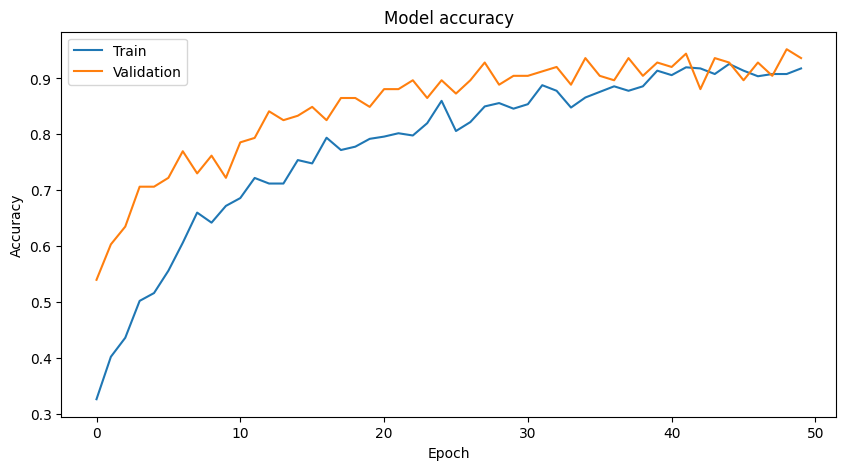

In [11]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Step 11: Visualizing Training and Validation Loss


In this step, we plot the training and validation loss values across epochs to visualize the model's learning dynamics.

Plotting Loss Values:
1. We utilize Matplotlib to create a line plot.
2. The x-axis represents the epochs, while the y-axis represents the loss values.
3. Both training loss (history.history['loss']) and validation loss (history.history['val_loss']) are plotted.

The plot illustrates how the loss (error) of the model changes during the training and validation phases.
Visualizing the training and validation loss provides insights into the model's convergence and generalization. Ideally, we aim for a decrease in both training and validation loss over epochs, indicating that the model is effectively learning to minimize errors and generalize to unseen data.

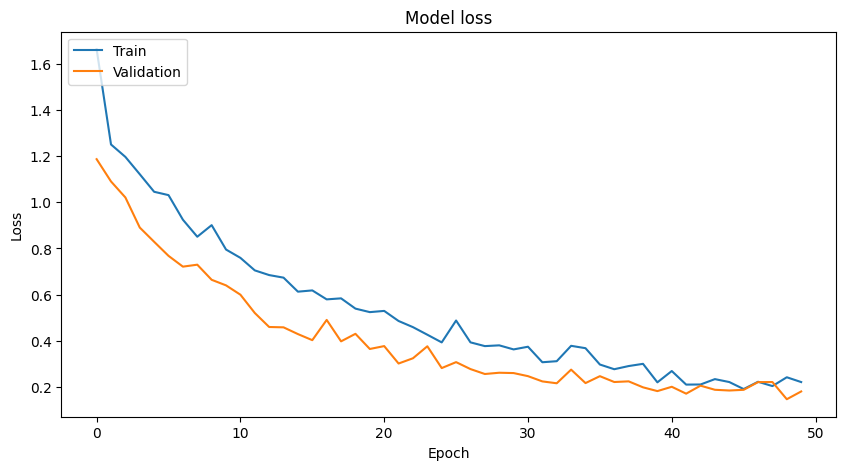

In [12]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Step 12: Predicting Probabilities for the Test Set

Prediction:
1. We use the predict method on the model_with_dropout object.
2. The method takes the test data (X_test) as input and returns the predicted probabilities for each class.
3. The predicted probabilities (y_pred_probs) represent the likelihood of each instance belonging to each class.

This step allows us to obtain probabilistic predictions from the model, which can be further analyzed or utilized for various tasks such as thresholding for classification or generating ROC curves for model evaluation.

In [13]:
# Predict probabilities for test set
y_pred_probs = model_with_dropout.predict(X_test)



4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step


### Step 13: Predicting Classes for the Test Set


In this step, we predict the classes for the test set instances based on the predicted probabilities obtained from the model.

Prediction:

1. We use NumPy's argmax function to determine the index of the class with the highest probability for each instance in the y_pred_probs array.
2. The predicted class indices (y_pred) represent the predicted classes for the corresponding test set instances.

This step converts the predicted probabilities into actual class predictions, enabling us to assess the model's performance in classifying the test instances. The predicted classes can be compared with the true labels to compute evaluation metrics such as accuracy, F1-score, and confusion matrix.

In [14]:
# Predict classes for test set
y_pred = np.argmax(y_pred_probs, axis=1)

### Step 14: Calculating F1 Score


In this step, we calculate the F1 score to evaluate the model's performance on the test set.

F1 Score Calculation:

We use the f1_score function from the sklearn.metrics module.
The function takes the true labels (y_test) and the predicted labels (y_pred) as inputs, along with the parameter average='weighted'.
The F1 score is computed for each class and then averaged based on the number of instances for each class (weighted averaging).

Printing F1 Score:

We print the calculated F1 score to the console using print('F1 Score:', f1).
The F1 score is a metric that combines precision and recall, providing a single value that reflects the model's accuracy in classification. It is particularly useful for imbalanced datasets and multi-class classification problems. Higher F1 scores indicate better overall performance of the model.

In [15]:
# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)


F1 Score: 0.9368658259112063


### Step 15: Generating ROC Curve


In this step, we generate the Receiver Operating Characteristic (ROC) curve to visualize the performance of the multi-class classification model.

ROC Curve Generation:

1. We iterate over each class index (i) to compute the False Positive Rate (FPR), True Positive Rate (TPR), and Area Under the Curve (AUC) for each class.
2. The roc_curve function from sklearn.metrics computes the FPR and TPR based on the true labels (y_test) and predicted probabilities (y_pred_probs) for each class.
3. The roc_auc_score function calculates the AUC for each class.

Plotting ROC Curve:

We use Matplotlib to create the ROC curve plot.
Each curve represents the ROC curve for a specific class, with the AUC value indicated in the legend.
The diagonal line represents the ROC curve for a random classifier, and a better classifier should have curves above this line.
Generating the ROC curve allows us to visually assess the model's performance in distinguishing between different classes. A higher AUC value indicates better discrimination ability of the model. The ROC curve is particularly useful for evaluating binary classifiers, but can also be adapted for multi-class classification tasks.

In [16]:
# Generate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_probs[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_pred_probs[:, i])

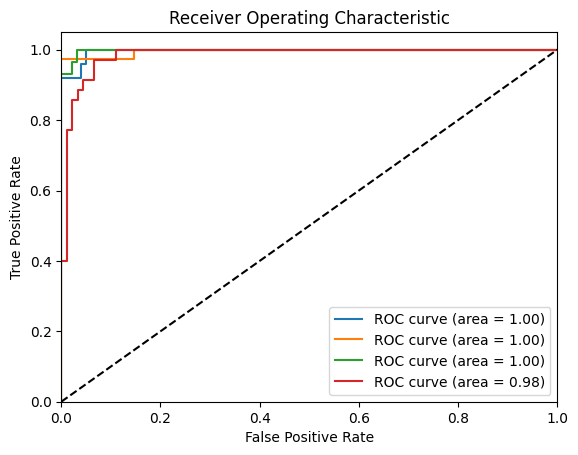

In [17]:
# Plot ROC curve
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Step 16: Generating Confusion Matrix


In this step, we generate the confusion matrix to evaluate the performance of the multi-class classification model.


In [18]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[22  0  1  2]
 [ 0 36  0  1]
 [ 0  0 29  0]
 [ 0  0  4 31]]


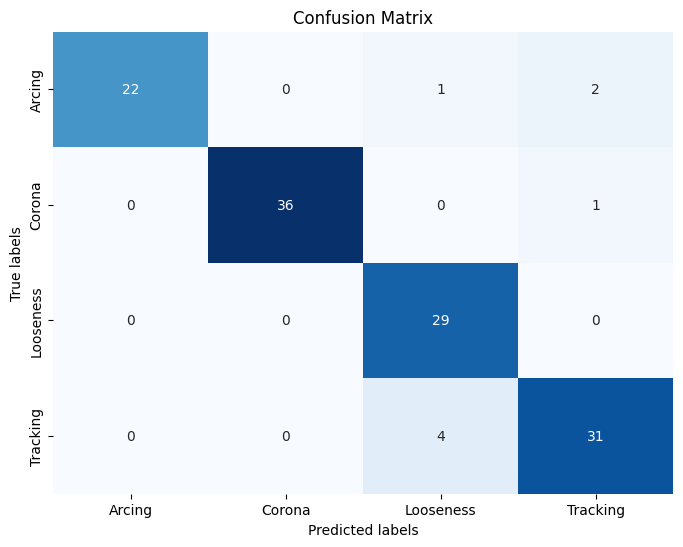

In [19]:
# Define your class labels
class_labels = ['Arcing', 'Corona', 'Looseness', 'Tracking']

# Plot confusion matrix using Seaborn with custom class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### Step 17: Plotting Classification Report


In this step, we define a function plot_classification_report to visualize the classification report generated by the model evaluation.

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        25
           1       1.00      0.97      0.99        37
           2       0.85      1.00      0.92        29
           3       0.91      0.89      0.90        35

    accuracy                           0.94       126
   macro avg       0.94      0.93      0.94       126
weighted avg       0.94      0.94      0.94       126



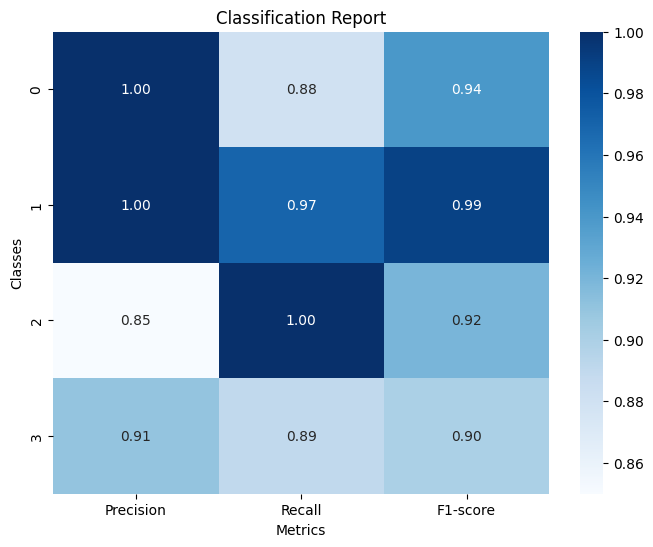

In [20]:

def plot_classification_report(classification_report):
    lines = classification_report.split('\n')
    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 5)]:
        t = line.split()
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)
    plotMat = np.array(plotMat)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(plotMat, annot=True, cmap='Blues', fmt='.2f', xticklabels=['Precision', 'Recall', 'F1-score'], yticklabels=classes)
    plt.title('Classification Report')
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.show()

# Classification report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

# Plot classification report using Seaborn
plot_classification_report(classification_rep)

### Step 18: Testing a Voice Sample


In this step, we define a function test_voice_sample to predict the class label for a given audio sample using the trained model.

Function Definition (test_voice_sample):

1. This function takes three parameters: audio_file_path (path to the audio sample), model (trained model), and label_encoder (encoder used for class labels).
2. It loads the audio file using librosa, extracts features from the audio, and reshapes the features to match the input shape expected by the model.
3. The model predicts the class probabilities for the audio sample, and the predicted class label is obtained by decoding the class index using the provided label encoder.
4. The predicted class label is printed to the console.

Example Usage:

We provide an example of how to use the test_voice_sample function.
Before testing the audio sample, we load and split the dataset (if not done previously), encode the labels, and train the model.
Finally, we call the test_voice_sample function with the path to the test audio sample (test_audio_file_path), the trained model (model_with_dropout), and the label encoder (encoder).

Testing a voice sample using the trained model allows us to assess its real-world performance in classifying unseen data. This step demonstrates the practical application of the model for fault detection and recognition tasks in machine audio signals.

In [21]:
from tensorflow.keras.models import load_model
def test_voice_sample(audio_file_path, model, class_labels):
    try:
        # Load audio file
        audio, sample_rate = librosa.load(audio_file_path, res_type='kaiser_fast')
        
        # Extract features from audio
        features = extract_features_from_audio(audio, sample_rate)
        
        # Reshape features to match model input shape
        features = np.expand_dims(features, axis=0)  # Add batch dimension
        
        # Predict class label
        predicted_probs = model.predict(features)
        predicted_class_index = np.argmax(predicted_probs)
        
        # Get the predicted class label from the provided class_labels list
        predicted_class_label = class_labels[predicted_class_index]
        
        print(f"Predicted class label: {predicted_class_label}, Index: {predicted_class_index}")
    
    except Exception as e:
        print(f"Error testing voice sample: {str(e)}")

# Example usage:
test_audio_file_path = 'samples/Tracking (6).wav'  # Replace with the path to your test audio sample

# Load the pre-trained model
model_with_dropout = load_model('last_trained_model.h5')  # Replace 'your_model.h5' with the path to your trained model file

# Define the class labels
class_labels = ['Arcing', 'Corona', 'Looseness', 'Tracking']

# Pass the pre-trained model and class labels to the test function
test_voice_sample(test_audio_file_path, model_with_dropout, class_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Predicted class label: Tracking, Index: 3
